<h1>Outlier </h1>
<ul>
<li> Observation having a different underlying behaviour than the rest of the observation</li>
<li>odd one out</li>
</ul>

<h1> Noise </h1>
<ul>
<li>wrong or unwanted data </li>
</ul>
<table>
  <tr>
    <th>occupation</th>
    <th>salary</th>
  </tr>
  <tr>
    <td>Teacher</td>
    <td>10000</td>
  </tr>
   <tr>
    <td>Doctor</td>
    <td>20000</td>
  </tr>
   <tr>
    <td>Engineer</td>
    <td>15000</td>

  </tr>
   <tr>
    <td>Singer</td>
    <td>5</td>
  </tr>
   <tr>
    <td>dancer</td>
    <td>cake</td>
  </tr>
  
</table>
here salary of singer is 5 which we call it as outlier and salary of dancer is cake which we call it as noise 

<h1> How to detect outliers? </h1>
<ol>
<li> For normally distributed data </li>
<ul>
<li> Using Z score :  The data points which fall below mean-3*(sigma) or above mean+3*(sigma) are outliers.</li>
</ul>
<li> For skewed data </li>
<ul>
<li> Using interquartile range :  The data points which fall below Q1 - 1.5* IQR or  Q3 + 1.5* IQR are outliers.</li>
</ul>
<li> Domain Expert </li>
<li> Data Visualization </li>
<ul>
<li> scatter plot</li>
<li> box plot </li>
</ul>
</ol>

<h1>How to treat outliers?</h1>
<ol>
<li>Trimming : droping rows with outlier data points</li>
<li>Capping : data ponits above or below certain points are placed a particular value </li>
<li>Treating it as Missing values</li>


IMPLEMENTATION 

In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
df = pd.read_csv('https://raw.githubusercontent.com/AnruthaKamal/ML-/main/Data/Placement_Data_Full_Class.csv')

In [40]:
df.head()

,hsc_p,salary
0,91.00,270000.0
1,78.33,200000.0
2,68.00,250000.0
3,52.00,NaN
4,73.60,425000.0


In [28]:
df.shape

(218, 2)

## DETECTING OUTLIERS 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


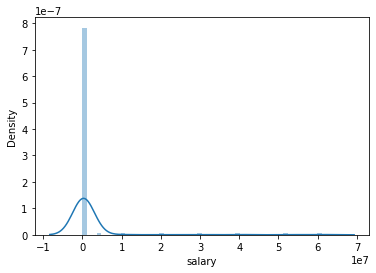

In [41]:
sns.distplot(df['salary'])

Salary : skewed distribution 
Therefore IQR can be used to detect the outliers 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


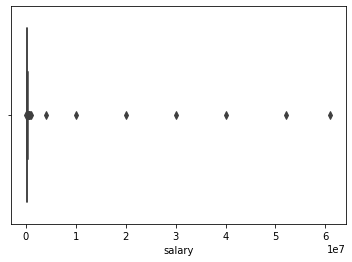

In [51]:
sns.boxplot(df['salary'])

In [52]:
percentile25 = df['salary'].quantile(0.25)
percentile75 = df['salary'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit_iqr = percentile75 + 1.5 * iqr
lower_limit_iqr = percentile25 - 1.5 * iqr

In [53]:
df[(df['salary'] > upper_limit_iqr) | (df['salary'] < lower_limit_iqr)]

,hsc_p,salary
4,73.60,425000.0
21,76.00,393000.0
39,68.00,411000.0
53,70.00,450000.0
77,80.00,500000.0
85,89.83,400000.0
95,78.00,420000.0
119,68.40,940000.0
128,73.40,400000.0
145,65.66,400000.0


outliers in hsc_p are listed above 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


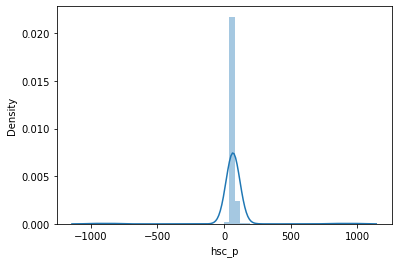

In [42]:
sns.distplot(df['hsc_p'])

hsc_p : normally distrubuted Therefore Z  score can be used to detect outliers 


In [49]:
upper_limit = df['hsc_p'].mean() + 3*df['hsc_p'].std()
lower_limit = df['hsc_p'].mean() - 3*df['hsc_p'].std()

In [25]:
lower_limit

8283.048146639136

In [47]:
upper_limit

24488720.71148564

In [50]:
df[(df['hsc_p'] > upper_limit) | (df['hsc_p'] < lower_limit)]

,hsc_p,salary
217,800.0,100.0
218,900.0,30000000.0
219,990.0,40000000.0
220,-900.0,4000300.0
221,-990.0,52100000.0
222,-801.0,61000000.0


outliers in hsc_p are listed above 

## OUTLIER TREATMENT 

<ol>
<li> Trimming </li>
Drop rows with outliers 

In [57]:
new_df = df[((df['hsc_p'] < upper_limit) | (df['hsc_p'] > lower_limit)) & ((df['salary'] < upper_limit_iqr) | (df['salary'] > lower_limit_iqr))]

In [59]:
new_df

,hsc_p,salary
0,91.00,270000.0
1,78.33,200000.0
2,68.00,250000.0
4,73.60,425000.0
7,64.00,252000.0
...,...,...
218,900.00,30000000.0
219,990.00,40000000.0
220,-900.00,4000300.0
221,-990.00,52100000.0


In [58]:
new_df.shape

(157, 2)

In [60]:
df.shape

(223, 2)

2. Capping : data ponits above or below certain points are placed a particular value


In [61]:
def cap_hsc_p(x):
  if x < lower_limit :
    return lower_limit
  elif x > upper_limit:
    return upper_limit
  else :
    return x 

def cap_salary(x):
  if x < lower_limit_iqr :
    return lower_limit_iqr
  elif x > upper_limit_iqr:
    return upper_limit_iqr
  else :
    return x 




In [74]:
new_df = df
new_df['hsc_p'] = new_df['hsc_p'].apply(lambda x : cap_hsc_p(x))
new_df['salary'] = new_df['salary'].apply(lambda x : cap_salary(x))

3. handling like missing value 

In [80]:
def miss_hsc_p(x):
  if x == None :
    return x
  if x < lower_limit :
    return None
  elif x > upper_limit:
    return None
  else :
    return x

def miss_salary(x):
  if x == None :
    return x
  if x < lower_limit_iqr :
    return None
  elif x > upper_limit_iqr:
    return None
  else :
    return x 




In [87]:
new_df = df
new_df['hsc_p'] = new_df['hsc_p'].apply(lambda x : miss_hsc_p(x))
new_df['salary'] = new_df['salary'].apply(lambda x : miss_salary(x))

In [89]:
new_df.isnull().sum()

hsc_p      6
salary    90
dtype: int64